In [1]:
% matplotlib inline
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from keras.utils.io_utils import HDF5Matrix

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Activation, Input
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16, VGG19, InceptionV3
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping 
import warnings
warnings.filterwarnings('ignore')

/home/priya/.local/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/home/priya/.local/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/home/priya/.local/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
/home/priya/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/priya/.local/lib/python2.7/site-packages/pandas/__init__

/home/priya/.local/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:18: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _stats
/home/priya/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/home/priya/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms


In [18]:
models_filename = 'v8_vgg16_model_1.h5'
image_dir = 'images'
image_size = (224, 224)
batch_size = 16
epochs = 80

In [19]:
models_filename

'v8_vgg16_model_1.h5'

In [36]:
# 5gb of images won't fit in my memory. use datagenerator to go across all images.
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = False,
fill_mode = "nearest",
zoom_range = 0,
width_shift_range = 0,
height_shift_range=0,
rotation_range=0)

train_generator = train_datagen.flow_from_directory(
image_dir,
target_size = (image_size[0], image_size[1]),
batch_size = batch_size, 
class_mode = "categorical")

num_of_classes = len(train_generator.class_indices)


Found 12067 images belonging to 101 classes.


In [40]:
num_of_classes

101

In [41]:
image_size

(224, 224)

In [23]:
model = VGG16(weights=None, include_top=False, input_shape=(image_size[0], image_size[1], 3))

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(101*2, activation="relu")(x)
x = Dense(101*2, activation="relu")(x)
predictions = Dense(101, activation="softmax")(x)
model_final = Model(input=model.input, output=predictions)
model_final.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model_final.load_weights(models_filename)


In [24]:


preds = model_final.evaluate_generator(train_generator, steps=800, workers=8, use_multiprocessing=True)
preds  



[1.4487706404253624, 0.7711738484398217]

In [125]:
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [126]:
print('Accuracy',preds[1]*100)
print('loss=' ,preds[0])

('Accuracy', 77.11738484398218)
('loss=', 1.4487706404253624)


('True_label:', 'croque_madame')
()
('predicted_label:', 'croque_madame')


('True_label:', 'lobster_bisque')
()
('predicted_label:', 'lobster_bisque')


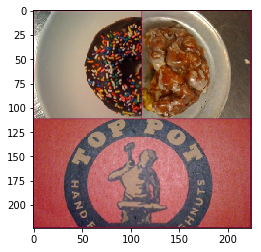

('True_label:', 'caprese_salad')
()
('predicted_label:', 'caprese_salad')


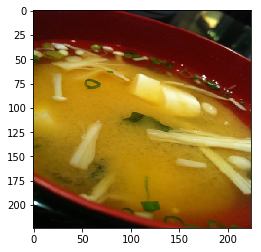

('True_label:', 'ravioli')
()
('predicted_label:', 'ravioli')


('True_label:', 'tacos')
()
('predicted_label:', 'tacos')


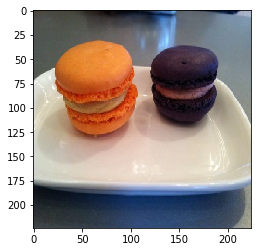

('True_label:', 'gyoza')
()
('predicted_label:', 'gyoza')


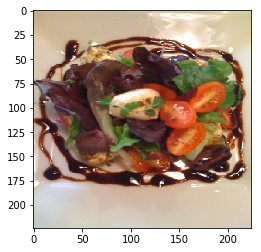

('True_label:', 'ramen')
()
('predicted_label:', 'ramen')


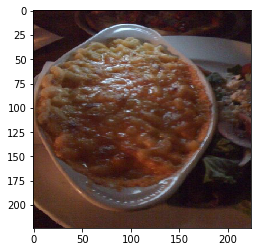

('True_label:', 'donuts')
()
('predicted_label:', 'donuts')


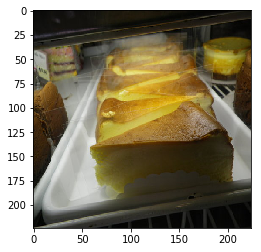

('True_label:', 'apple_pie')
()
('predicted_label:', 'apple_pie')


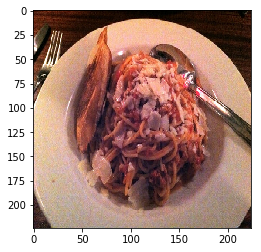

('True_label:', 'pizza')
()
('predicted_label:', 'hot_dog')


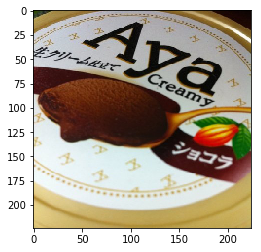

('True_label:', 'croque_madame')
()
('predicted_label:', 'baby_back_ribs')


('True_label:', 'beignets')
()
('predicted_label:', 'beignets')


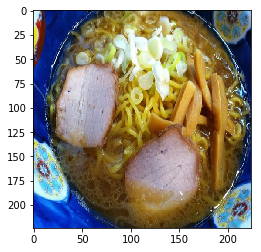

('True_label:', 'takoyaki')
()
('predicted_label:', 'takoyaki')


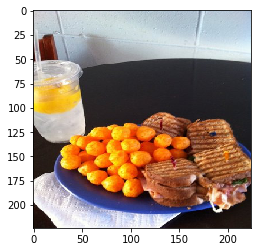

('True_label:', 'club_sandwich')
()
('predicted_label:', 'gyoza')


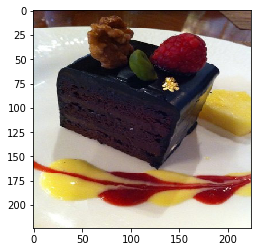

('True_label:', 'steak')
()
('predicted_label:', 'steak')


In [127]:
# routine for human evaluation - use the generator so we can see how well it can predict
for n in range(15):
    _ = train_generator.next()
    image, classifier = (_[0][0],_[1][0]) # take the first image from the batch
    index = np.argmax(classifier)
    answer = list(train_generator.class_indices.keys())[index]
    predicted = model_final.predict(np.asarray([image]))
    predicted_answer_index = np.argmax(predicted[0])
    predicted_answer = list(train_generator.class_indices.keys())[predicted_answer_index]
    
  

    plt.imshow(image)
   
    plt.show()

    print('True_label:', answer)
   
    print()
    print('predicted_label:', predicted_answer)


In [136]:
y_pred=model_final.predict(np.asarray([image]))
pred_answer = np.argmax(predicted[0])
pre = list(train_generator.class_indices.keys())[pred_answer]

In [137]:
pre

'steak'